In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# loading data
twomoon = np.loadtxt('twomoons.dat')
tm_x = twomoon[:,1:]
tm_y = twomoon[:,0]
train123 = np.loadtxt('dtrain123.dat')

# Experiment 1

#### visualise original data

Text(0.5, 1.0, 'Original data')

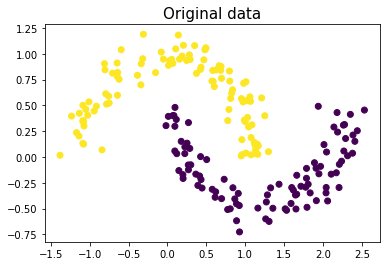

In [4]:
plt.scatter(tm_x[:,0], tm_x[:,1], c = tm_y)
plt.title('Original data', fontsize = 15)

#### kernel function and training function

In [9]:
def gaussian_kernel(xi,xj, c):
    return (np.exp(-c*np.linalg.norm(xi- xj, axis = 1)**2))
    

def spectral_clustering(x,y,c):
    n,d = x.shape

    # compute the Gram matrix
    adj_w_mtx = np.zeros((n,n))
    for i in range(n):
        adj_w_mtx[i,:] = gaussian_kernel(x, x[i,:], c)
    
    D_mtx = np.diag(np.sum(adj_w_mtx, axis = 1))    # compute the graph laplacian
    
    lam,v = np.linalg.eigh(D_mtx-adj_w_mtx)     # eigen decompose the laplacian

    v2= v[:, np.argsort(lam)[1]]        # obtain the second smallest eigenvector

    y_pred = np.sign(v2).astype(int)    # flip the sign if the label is reversed
    if np.mean(y_pred == y) <0.5:
        y_pred = - y_pred
    accuracy = np.mean(y_pred == y)
 #=================================================================   
 #  CP function:
 #  l_plus = np.sum(y_pred==y)
 #  accuracy = np.max(l_plus,(len(y)-l_plus))/len(y)
 # ================================================================
 
    return accuracy, y_pred

Text(0, 0.5, 'accuracy')

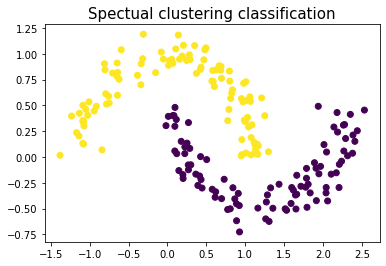

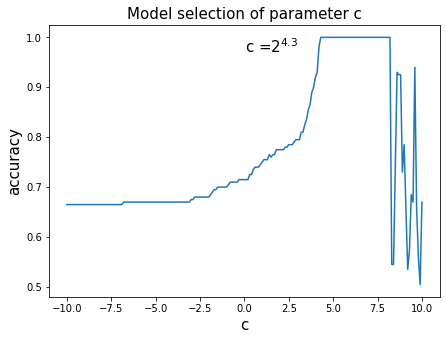

In [6]:
# visualise the clustered data

_, y_predict = spectral_clustering(tm_x,tm_y,20)
plt.scatter(tm_x[:,0], tm_x[:,1], c = y_predict)
plt.title('Spectual clustering classification',fontsize = 15)


# visualise the effect of parameter c on model accuracy
parameter_tm = np.linspace(-10,10, 201)
correctness_tm = np.zeros_like(parameter_tm)

for i in range(len(parameter_tm)):
    
    # calculating accuracy for each parameter
    correctness_tm[i],_ = spectral_clustering(tm_x, tm_y, 2**(parameter_tm[i]))

fig = plt.figure(figsize = (7,5))
plt.plot(parameter_tm, correctness_tm)
plt.annotate('c =$ 2^{%.1f }$' % parameter_tm[np.argwhere(correctness_tm==1)[0]],  (0.017, 0.97), fontsize = 15)
plt.title('Model selection of parameter c',fontsize = 15)
plt.xlabel('c', fontsize =15)
plt.ylabel('accuracy',fontsize = 15)


# Experiment 2

Text(0, 0.5, 'accuracy')

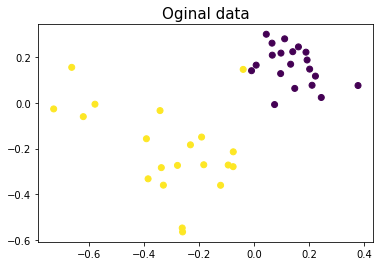

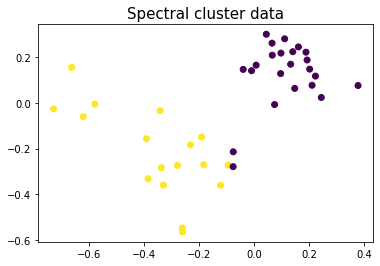

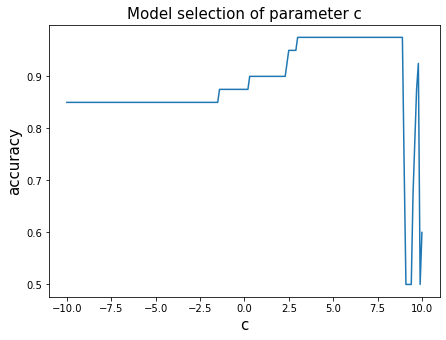

In [10]:
# generating data:
one = np.random.multivariate_normal([-0.3,-0.3], [[0.04, 0],[0,0.04]], size = 20)
neg_one = np.random.multivariate_normal([0.15,0.15], [[0.01, 0],[0,0.01]], size = 20)

# concatenate data of 2 different class
y_data = np.concatenate((np.ones(20),-np.ones(20)))
x_data = np.concatenate((one,neg_one))
data = np.concatenate((x_data,y_data.reshape(-1,1)), axis =1)

#visualise the original data
plt.scatter(data[:,0], data[:,1], c = data[:,2])
plt.title('Oginal data', fontsize = 15)

# use spectral clustering to cluster the synthetic data
_, y_predict = spectral_clustering(data[:,0:2], data[:,2], 5)

# visualise the cluster data
plt.figure()
plt.scatter(data[:,0], data[:,1], c = y_predict)
plt.title('Spectral cluster data', fontsize = 15)


# visualise the effect of parameter c on model accuracy
parameter_gauss = np.linspace(-10,10, 201)
correctness_gauss = np.zeros_like(parameter_gauss)

for i in range(len(parameter_gauss)):
    correctness_gauss[i],_ = spectral_clustering(data[:,0:2], data[:,2], 2**(parameter_gauss[i]))

fig = plt.figure(figsize = (7,5))
plt.plot(parameter_gauss, correctness_gauss)
plt.title('Model selection of parameter c',fontsize = 15)
plt.xlabel('c', fontsize =15)
plt.ylabel('accuracy',fontsize = 15)

0.01

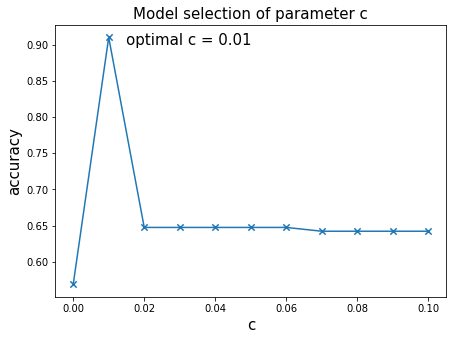

In [8]:
# loading 1,2,3 digits dataset
train_1_3= np.delete(train123, np.argwhere(train123[:,0]==2),axis=0)
y_13, x_13 = train_1_3[:, 0], train_1_3[:, 1:]
class_y = 2*(y_13 == 1)-1


parameter_13 = np.linspace(0,0.1,11)
correctness_13 = np.zeros_like(parameter_13)

# perform clustering
for i in range(len(parameter_13)):
    correctness_13[i],_ = spectral_clustering(x_13, class_y, parameter_13[i])

# visualise
fig = plt.figure(figsize = (7,5))
plt.plot(parameter_13, correctness_13)
plt.scatter(parameter_13, correctness_13, marker = 'x', s =40)
plt.annotate('optimal c = 0.01',  (0.015, 0.9), fontsize = 15)
plt.title('Model selection of parameter c',fontsize = 15)
plt.xlabel('c', fontsize =15)
plt.ylabel('accuracy',fontsize = 15)
parameter_13[np.argmax(correctness_13)]